In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#On charge nos données depuis le fichier excel
df = pd.read_excel('C:\\Users\\nisri\\Downloads\\final_dataset.xlsx')
df.head()

In [6]:
#Les features qu'on veut garder seront stockés en X
X = df.drop(['alim_grp_code', 'alim_ssgrp_code', 'alim_ssssgrp_code'], axis=1)
X

,"Energie, Règlement UE N° 1169/2011 (kJ/100 g)","Energie, Règlement UE N° 1169/2011 (kcal/100 g)","Energie, N x facteur Jones, avec fibres (kJ/100 g)","Energie, N x facteur Jones, avec fibres (kcal/100 g)",Eau (g/100 g),"Protéines, N x facteur de Jones (g/100 g)","Protéines, N x 6.25 (g/100 g)",Glucides (g/100 g),Lipides (g/100 g),Sucres (g/100 g),...,Vitamine K1 (µg/100 g),Vitamine K2 (µg/100 g),Vitamine C (mg/100 g),Vitamine B1 ou Thiamine (mg/100 g),Vitamine B2 ou Riboflavine (mg/100 g),Vitamine B3 ou PP ou Niacine (mg/100 g),Vitamine B5 ou Acide pantothénique (mg/100 g),Vitamine B6 (mg/100 g),Vitamine B9 ou Folates totaux (µg/100 g),Vitamine B12 (µg/100 g)
0,0.232912,0.228929,0.232716,0.228746,0.454000,0.053280,0.053049,0.366733,0.1290,0.237475,...,0.012238,0.052237,0.000481,0.007241,0.020000,0.005810,0.003008,0.009032,0.013162,0.001400
1,0.232912,0.228929,0.232716,0.228746,0.765000,0.105293,0.105293,0.077555,0.0470,0.030862,...,0.012238,0.052237,0.000965,0.001724,0.007067,0.042381,0.000602,0.046774,0.013248,0.009667
2,0.232912,0.228929,0.232716,0.228746,0.767000,0.092750,0.092750,0.064128,0.0530,0.019038,...,0.005702,0.052237,0.003420,0.002759,0.002933,0.039333,0.001504,0.019355,0.004744,0.008200
3,0.232912,0.228929,0.232716,0.228746,0.852000,0.023936,0.023936,0.039579,0.0355,0.023848,...,0.012238,0.052237,0.002340,0.004828,0.028000,0.017524,0.006617,0.014194,0.008376,0.000120
4,0.232912,0.228929,0.232716,0.228746,0.760000,0.030840,0.030840,0.099198,0.0820,0.073844,...,0.012238,0.052237,0.003509,0.006638,0.008000,0.008476,0.003985,0.022581,0.002991,0.000000
5,0.203514,0.198668,0.203514,0.198668,0.603000,0.056157,0.056157,0.237475,0.0670,0.049098,...,0.006199,0.052237,0.002200,0.007500,0.003200,0.004762,0.001955,0.008387,0.006197,0.000000
6,0.146486,0.144284,0.146486,0.144284,0.758000,0.051784,0.051784,0.088878,0.0830,0.012024,...,0.006374,0.052237,0.007579,0.006897,0.006533,0.009333,0.003308,0.015968,0.009231,0.011058
7,0.232912,0.228929,0.232716,0.228746,0.725000,0.059033,0.059033,0.161323,0.0435,0.010020,...,0.012238,0.052237,0.001572,0.005000,0.006000,0.025238,0.001053,0.020968,0.014316,0.002867
8,0.232912,0.228929,0.232716,0.228746,0.726000,0.065593,0.065593,0.137275,0.0810,0.023046,...,0.012238,0.052237,0.007368,0.003448,0.002667,0.003810,0.000000,0.014516,0.006838,0.000000
9,0.033784,0.033185,0.033784,0.033185,0.932000,0.010817,0.010817,0.030762,0.0070,0.022745,...,0.014035,0.052237,0.004281,0.003621,0.003333,0.003524,0.001278,0.013226,0.016581,0.000000


In [7]:
#Les targets qu'on essaye d'obtenir
y = df[['alim_grp_code', 'alim_ssgrp_code', 'alim_ssssgrp_code']]
y

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code
0,0,0,0
1,1,101,0
2,1,101,0
3,1,101,0
4,1,101,0
5,1,101,0
6,1,101,0
7,1,101,0
8,1,101,0
9,1,101,0


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
#Linear SVC classification
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Réglage des hyper-parameters pour %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train['alim_grp_code'])

    print("Les meilleurs paramètres trouvés : ")
    print()
    print(clf.best_params_)
    print()
    print("Scores du grid :")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) pour %r"
              % (mean, std * 2, params))
    print()

print("Test set score: {:.2f} ".format(round(svc.score(X_test,y_test['alim_grp_code']), 4)))
print("Training set score: {:.2f} ".format(round(svc.score(X_train,y_train['alim_grp_code']), 4)))

# Réglage des hyper-parameters pour precision



C:\Users\nisri\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\nisri\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nisri\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nisri\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nisri\

C:\Users\nisri\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Les meilleurs paramètres trouvés : 

{'C': 100, 'kernel': 'linear'}

Scores du grid :

0.022 (+/-0.002) pour {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.022 (+/-0.002) pour {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.182 (+/-0.019) pour {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.022 (+/-0.002) pour {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.540 (+/-0.051) pour {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.182 (+/-0.019) pour {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.642 (+/-0.046) pour {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.540 (+/-0.050) pour {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.635 (+/-0.047) pour {'C': 1, 'kernel': 'linear'}
0.729 (+/-0.076) pour {'C': 10, 'kernel': 'linear'}
0.768 (+/-0.082) pour {'C': 100, 'kernel': 'linear'}
0.755 (+/-0.068) pour {'C': 1000, 'kernel': 'linear'}

# Réglage des hyper-parameters pour recall



C:\Users\nisri\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\nisri\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\nisri\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Les meilleurs paramètres trouvés : 

{'C': 1000, 'kernel': 'linear'}

Scores du grid :

0.088 (+/-0.007) pour {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.088 (+/-0.007) pour {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.222 (+/-0.020) pour {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.088 (+/-0.007) pour {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.415 (+/-0.045) pour {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.222 (+/-0.020) pour {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.551 (+/-0.047) pour {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.415 (+/-0.045) pour {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.497 (+/-0.039) pour {'C': 1, 'kernel': 'linear'}
0.633 (+/-0.069) pour {'C': 10, 'kernel': 'linear'}
0.705 (+/-0.069) pour {'C': 100, 'kernel': 'linear'}
0.724 (+/-0.056) pour {'C': 1000, 'kernel': 'linear'}

Test set score: 0.70 
Training set score: 0.72 


In [35]:
#Le modèle du plus proche voisin
from sklearn.neighbors import KNeighborsClassifier

#Classification en groupes seulement reste en sous groupe et sous sous groupe

model = KNeighborsClassifier(n_neighbors=5) #varier les voisins pour avoir un score parfait

model.fit(X_train, y_train['alim_grp_code'])

print("Test set score: {:.2f} ".format(round(model.score(X_test,y_test['alim_grp_code']), 4)))
print("Training set score: {:.2f} ".format(round(model.score(X_train,y_train['alim_grp_code']), 4)))



Test set score: 0.81 
Training set score: 0.88 


In [ ]:
#Fonction pour prédire le groupe d'un aliment donné
def nouvel_aliment(model, composants):
    x = np.array(composants).reshape(1, composants.shape[0])
    print(model.predict(x))
    print(model.predict_proba(x))

             precision    recall  f1-score   support

          1       0.57      0.76      0.65        71
          2       0.77      0.84      0.80       121
          3       0.82      0.79      0.81        39
          4       0.94      0.92      0.93       153
          5       0.88      0.84      0.86        55
          6       0.92      0.62      0.74        71
          7       0.85      0.93      0.89        60
          8       0.33      0.40      0.36         5
          9       0.89      0.94      0.91        17
         10       0.70      0.45      0.55        42
         11       0.50      0.75      0.60         4

avg / total       0.82      0.81      0.80       638

0.8056426332288401
Mean Absolute Error: 0.7931034482758621
Mean Squared Error: 4.576802507836991
Root Mean Squared Error: 2.1393462804878016


C:\Users\nisri\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


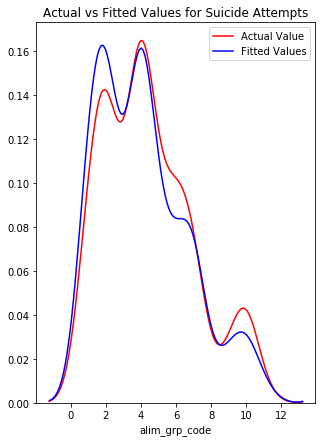

In [41]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import seaborn as sns
confusion_matrix(y_test['alim_grp_code'], model.predict(X_test))
print(classification_report(y_test['alim_grp_code'],model.predict(X_test)))
print(accuracy_score(y_test['alim_grp_code'], model.predict(X_test)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test['alim_grp_code'], model.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test['alim_grp_code'], model.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test['alim_grp_code'], model.predict(X_test))))

plt.figure(figsize=(5, 7))

ax = sns.distplot(y_test['alim_grp_code'], hist=False, color="r", label="Actual Value")
sns.distplot(model.predict(X_test), hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')

plt.show()
plt.close()


In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

def evaluation(model) :
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)

    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

evaluation(model)

[[  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  51   5   3   6   2   0   0   0   0   2   0]
 [  0   3 109   2   1   0   1   1   0   0   6   1]
 [  0   1   0  27   1   0   0   5   0   0   3   1]
 [  0   5   0   0 159   0   0   0   0   0   0   0]
 [  0   1   1   0   3  35   5   1   2   0   0   2]
 [  0   1   1   1   0   2  49   2   0   0   1   2]
 [  2   0   0   4   0   2   0  40   1   0   0   1]
 [  0   0   1   0   0   0   0   0   3   0   0   0]
 [  0   0   1   0   0   0   0   0   0  18   0   0]
 [  0   5   8   3   2   2   2   0   0   0  30   1]
 [  0   0   0   0   0   1   0   0   0   0   0   7]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.76      0.74      0.75        69
          2       0.87      0.88      0.87       124
          3       0.68      0.71      0.69        38
          4       0.92      0.97      0.95       164
          5       0.80      0.70      0.74        50
          6    

C:\Users\nisri\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [21]:
#Cross validation : KFold
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import KFold, LeaveOneOut
cv = KFold(5,shuffle=True, random_state=0)
#cv = LeaveOneOut()
print(cross_val_score(KNeighborsClassifier(), X_normalized, y, cv=cv))


C:\Users\nisri\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nisri\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nisri\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nisri\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was

[0.80721003 0.8100471  0.8288854  0.81475667 0.83202512]


C:\Users\nisri\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [20]:
#from sklearn.model_selection import validation_curve
#train_score, val_score = validation_curve(KNeighborsClassifier(), X_train, y_train, 'n_neighbors', k, cv=5)
#plt.plot(k, val_score.mean(axis=1))